In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [4]:
df = pd.read_csv('abc_report.csv', sep=';')
df

,KodeMenu,NamaMenu,Bulan,Category,Branch,Harga,Total,DineIn,TakeAway,Gojek/Grab,_1,_2,_3,TotalHarga
0,F0019,Add Bakso Banjir Keju,October,Food,Pandu,15454,5,5,0,0,0,0,3082,74188
1,F0019,Add Bakso Banjir Keju,October,Food,Pandu,15454,1,1,0,0,0,0,0,15454
2,F0019,Add Bakso Banjir Keju,September,Food,Pandu,15454,50,31,18,1,0,0,24711,747989
3,F0019,Add Bakso Banjir Keju,September,Food,Pandu,15454,1,1,0,0,0,0,0,15454
4,B0027,add Bakso keju,October,Food,SW,15454,8,7,0,0,1,0,7090,116542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,B0098,Tropical Punch,September,Drink,SW,20000,1,1,0,0,0,0,0,20000
430,B0079,Tropical Sunrise,October,Drink,Pandu,18182,4,4,0,0,0,0,117,72611
431,B0079,Tropical Sunrise,September,Drink,Pandu,18182,11,11,0,0,0,0,7849,192153
432,B0092,Tropical Sunrise,October,Drink,SW,18182,1,1,0,0,0,0,0,18182


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   KodeMenu    434 non-null    object
 1   NamaMenu    434 non-null    object
 2   Bulan       434 non-null    object
 3   Category    434 non-null    object
 4   Branch      434 non-null    object
 5   Harga       434 non-null    int64 
 6   Total       434 non-null    int64 
 7   DineIn      434 non-null    int64 
 8   TakeAway    434 non-null    int64 
 9   Gojek/Grab  434 non-null    int64 
 10  _1          434 non-null    int64 
 11  _2          434 non-null    int64 
 12  _3          434 non-null    int64 
 13  TotalHarga  434 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 47.6+ KB


In [6]:
df.describe()

,Harga,Total,DineIn,TakeAway,Gojek/Grab,_1,_2,_3,TotalHarga
count,434.000000,434.000000,434.00000,434.000000,434.000000,434.000000,434.000000,434.000000,4.340000e+02
mean,17364.619816,31.921659,26.81106,1.730415,1.960829,0.649770,0.769585,22011.412442,4.169262e+05
std,9851.091578,50.630786,43.46102,11.378382,8.574135,4.176467,4.583069,45612.671059,7.168216e+05
min,0.000000,1.000000,-2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8181.000000,3.000000,3.00000,0.000000,0.000000,0.000000,0.000000,688.000000,3.903400e+04
50%,18182.000000,11.000000,10.00000,0.000000,0.000000,0.000000,0.000000,6415.000000,1.436785e+05
75%,23636.000000,34.000000,28.00000,1.000000,0.000000,0.000000,0.000000,19770.750000,4.276392e+05
max,68182.000000,331.000000,323.00000,215.000000,130.000000,57.000000,69.000000,396265.000000,4.776425e+06


In [27]:
text = list((df['NamaMenu']+',')*df['Total'])
len(text)

434

In [29]:
text[:5]

['Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,',
 'Add Bakso Banjir Keju,',
 'Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Keju,Add Bakso Banjir Kej

In [66]:
list_text = []
textt = []

for i in text :
    i = i.split(',')
    list_text.append(i)
        
for i in list_text:
    for j in i:
        j = j.replace(' ','')
        j = j.replace('Add','')
        if len(j)==0:
            continue
        else:
            textt.append(j)

In [67]:
len(textt)

13854

In [73]:
myset = set(textt)
myset

{'AirMineral',
 'BaksoBanjirKeju',
 'BaksoBomberKuahKuningBogor',
 'BaksoBomberKuahRawon',
 'BaksoKejuKuahKuningBogor',
 'BaksoKejuKuahMerah',
 'BaksoKejuKuahOriginal',
 'BaksoKejuKuahRawon',
 'BaksoLadaHitam',
 'BaksoLadaHitamKuahKuning',
 'BaksoLadaHitamKuahOriginal',
 'BaksoLadaHitamKuahRawon',
 'BaksoLadahitamKuahMerah',
 'BaksoRanjauHitam',
 'BaksoTampolKuahKuningBogor',
 'BaksoTampolKuahMerah',
 'BaksoTampolKuahOriginal',
 'BaksoTampolKuahRawon',
 'BaksoUratBerserat',
 'BaksoUratKuahKuningBogor',
 'BaksoUratKuahMerah',
 'BaksoUratKuahOriginal',
 'BaksoUratKuahRawon',
 'BaperKuahLautMerah',
 'BaperKuahOriginal',
 'BerryYakult',
 'Blackcurrant',
 'Bomber+Pentol2KuahMerah',
 'Bomber+Pentol2Original',
 'Bomber+PentolMerah',
 'Bomber+PentolOriginal',
 'Boomber(addional)',
 'Boomber(itional)',
 'BowlTakeAway',
 'BowlTakeaway',
 'BrownSugarBobbaMilk',
 'CappucinoDingin',
 'CappucinoPanas',
 'Coklat',
 'CupGelasMisterius',
 'CuptakeAway',
 'EsLobiKhasMisterius',
 'EsManggaKhasMisterius',

In [78]:
str =  ' '.join(textt)

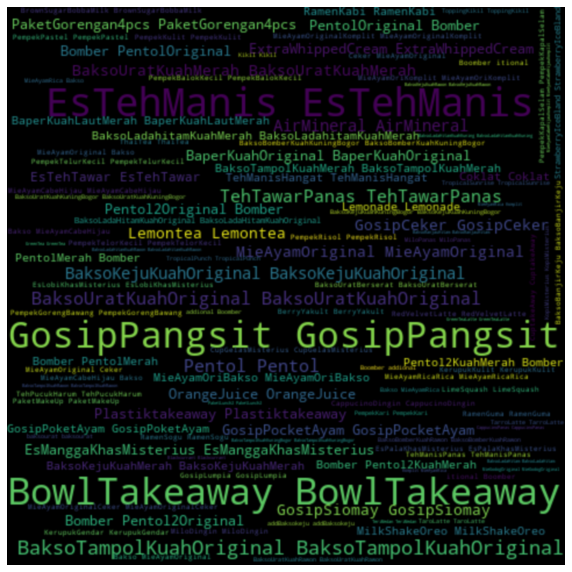

In [84]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str)

# Display the generated image:
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

(-0.5, 2999.5, 1999.5, -0.5)

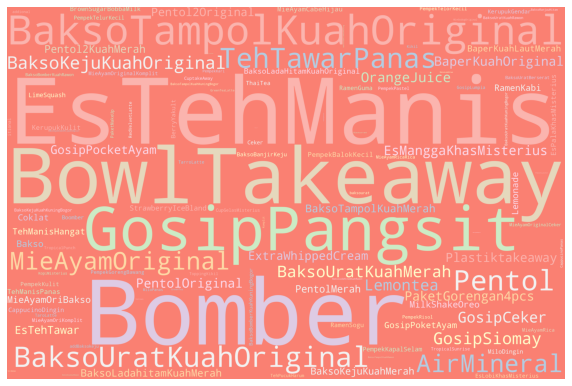

In [89]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', collocations=False).generate(str)
# Plot

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.margins(x=0, y=0)
plt.axis("off")

In [ ]:
makanan = list((df['NamaMenu']+',')*df['Total'])